## Question 4 : Linear Regression (Weather Prediction)

Importing the libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Reading the dataset and understanding it

In [14]:
dataset=pd.read_csv("/home/shubham/SMAI/Assignment2/Assignment-2_Dataset/Datasets/Question-4/weather.csv")
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
77280,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.
77281,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
77282,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
77283,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


### Checking whether the data contain any missing value or not

In [15]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 404
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

So there are null values in precip type but actually it some valid values so we will replace it with some other value like 'nothing'.

In [16]:
dataset["Precip Type"].fillna("nothing", inplace = True) 

Now there is no missing value in our dataset.

In [17]:
dataset.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Preprocessing the dataset for linear regression

Now, for categorical data, we will do <b>one-hot encoding using pd.get_dummies()</b>

In [18]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['Precip Type'])],axis=1)

In [19]:
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,nothing,rain,snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,0,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,0,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,0,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,0,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,2016-09-09 18:00:00.000 +0200,Partly Cloudy,rain,28.838889,27.850000,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.,0,1,0
77281,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.,0,1,0
77282,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.,0,1,0
77283,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.,0,1,0


Now, I added the one-hot encoded columns to dataset. Now, delete the column 'Precip Type'.

In [20]:
dataset=dataset.drop(['Precip Type'], axis = 1) 

Now, separating the label from the database

In [21]:
y=dataset['Apparent Temperature (C)']
y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
77280    27.850000
77281    26.016667
77282    24.583333
77283    22.038889
77284    21.522222
Name: Apparent Temperature (C), Length: 77285, dtype: float64

Drop the 'Apparent Temperature (C)' column from the dataset

In [22]:
dataset=dataset.drop(['Apparent Temperature (C)'], axis = 1) 
dataset

,Formatted Date,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,nothing,rain,snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,0,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,0,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,0,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,0,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77280,2016-09-09 18:00:00.000 +0200,Partly Cloudy,28.838889,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.,0,1,0
77281,2016-09-09 19:00:00.000 +0200,Partly Cloudy,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.,0,1,0
77282,2016-09-09 20:00:00.000 +0200,Partly Cloudy,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.,0,1,0
77283,2016-09-09 21:00:00.000 +0200,Partly Cloudy,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.,0,1,0


Now, Preprocess the Formatted datetime and taking only the month from it and use month for the weather prediction.

In [23]:
from datetime import datetime
import time

for i in range(dataset.shape[0]):
    s = str(dataset['Formatted Date'][i])
    d = datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f %z")
    # print(time.mktime(d.timetuple()))
#     print(d.month)
    dataset['Formatted Date'][i]=d.month
# dataset
dataset=pd.concat([dataset,pd.get_dummies(dataset['Formatted Date'])],axis=1)
dataset=dataset.drop(['Formatted Date'], axis = 1) 
dataset

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,nothing,rain,...,3,4,5,6,7,8,9,10,11,12
0,Partly Cloudy,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,0,1,...,0,1,0,0,0,0,0,0,0,0
1,Partly Cloudy,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Mostly Cloudy,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,0,1,...,0,1,0,0,0,0,0,0,0,0
3,Partly Cloudy,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Mostly Cloudy,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,Partly Cloudy,28.838889,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.,0,1,...,0,0,0,0,0,0,1,0,0,0
77281,Partly Cloudy,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.,0,1,...,0,0,0,0,0,0,1,0,0,0
77282,Partly Cloudy,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.,0,1,...,0,0,0,0,0,0,1,0,0,0
77283,Partly Cloudy,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.,0,1,...,0,0,0,0,0,0,1,0,0,0


## To extract the features from the column (Summary and Daily Summary), we can use vectorizer:

### 1. CountVectorizer
### 2. TfIdfVectorizer

Here, I have used TfIdfVectorizer, because the importance of the word increases proportionally to the number of times a word appears in the document.

### TfIdfVectorizer

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

Term Frequency :

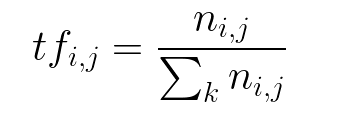


Inverse Data Frequency (IDF):
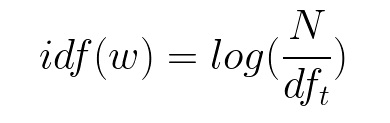

## Tf-Idf:

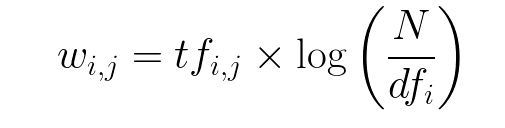

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
word_vectorizer = TfidfVectorizer(min_df=1,stop_words='english')

word_vectorizer.fit(dataset['Summary'])
features = word_vectorizer.transform(dataset['Summary'])
df_vectors = features.toarray()
vocabulary = word_vectorizer.get_feature_names()
len(vocabulary)

13

In [26]:
dataset = pd.concat(
    [
        dataset,
        pd.DataFrame(
            df_vectors, 
            index=dataset.index, 
            columns=vocabulary
        )
    ], axis=1
)

In [27]:
dataset

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,nothing,rain,...,dangerously,drizzle,dry,foggy,humid,light,overcast,partly,rain,windy
0,Partly Cloudy,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
1,Partly Cloudy,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
2,Mostly Cloudy,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Partly Cloudy,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
4,Mostly Cloudy,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,Partly Cloudy,28.838889,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
77281,Partly Cloudy,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
77282,Partly Cloudy,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0
77283,Partly Cloudy,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820864,0.0,0.0


In [28]:
word_vectorizer = TfidfVectorizer(min_df=1,stop_words='english')

word_vectorizer.fit(dataset['Daily Summary'])
features = word_vectorizer.transform(dataset['Daily Summary'])
df_vectors = features.toarray()
vocabulary = word_vectorizer.get_feature_names()
len(vocabulary)

18

In [29]:
dataset = pd.concat(
    [
        dataset,
        pd.DataFrame(
            df_vectors, 
            index=dataset.index, 
            columns=vocabulary
        )
    ], axis=1
)
dataset

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,nothing,rain,...,foggy,light,morning,night,overcast,overnight,partly,rain,starting,windy
0,Partly Cloudy,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
1,Partly Cloudy,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
2,Mostly Cloudy,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
3,Partly Cloudy,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
4,Mostly Cloudy,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,0,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,Partly Cloudy,28.838889,0.32,12.2038,21,16.1000,1014.07,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77281,Partly Cloudy,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77282,Partly Cloudy,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77283,Partly Cloudy,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.,0,1,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0


In [30]:
dataset=dataset.drop(['Summary','Daily Summary'], axis = 1) 
dataset

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),nothing,rain,snow,1,...,foggy,light,morning,night,overcast,overnight,partly,rain,starting,windy
0,9.472222,0.89,14.1197,251,15.8263,1015.13,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
1,9.355556,0.86,14.2646,259,15.8263,1015.63,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
2,9.377778,0.89,3.9284,204,14.9569,1015.94,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
3,8.288889,0.83,14.1036,269,15.8263,1016.41,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
4,8.755556,0.83,11.0446,259,15.8263,1016.51,0,1,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.623957,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,28.838889,0.32,12.2038,21,16.1000,1014.07,0,1,0,0,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77281,26.016667,0.43,10.9963,31,16.1000,1014.36,0,1,0,0,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77282,24.583333,0.48,10.0947,20,15.5526,1015.16,0,1,0,0,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0
77283,22.038889,0.56,8.9838,30,16.1000,1015.66,0,1,0,0,...,0.0,0.0,0.583452,0.0,0.0,0.0,0.492773,0.0,0.548416,0.0


Now, the preprocessing is done. We can now apply linear regression.


### Linear Regression

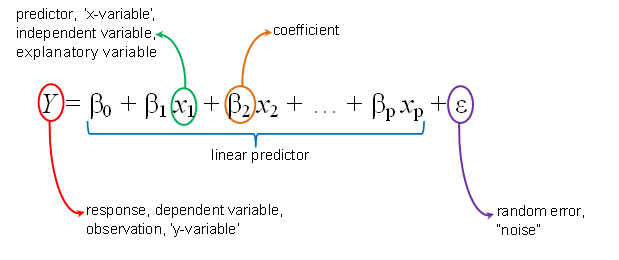

### Cost Function

A Cost Function/Loss Function evaluates the performance of our Machine Learning Algorithm.

A Cost function basically tells us ‘ how good’ our model is at making predictions for a given value of parameters(thetas).

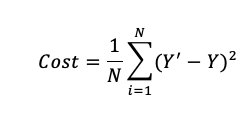

### Minimizing the Cost Function

The goal of any Machine Learning Algorithm is to minimize the Cost Function.

### Gradient Descent

#### Algorithm:

Repeat until converges
<br>
{
<br>
$\;\;\;\;\;\;$ for j=0 and j=n:
<br>
$\;\;\;\;\;\;$ $θj=θj − α \frac{∂}{∂θj}J(θ)$
<br>
}

#### α is the learning rate, value that specifies how small are steps we take.

### Implementation

In [31]:
def gradient_descent(X, y, theta, iterations, a):
    past_costs = []
    past_thetas = [theta]
    theta=theta.T
    theta=theta.reshape(len(theta),1)
    y=y.reshape(len(y),1)
    print(theta.shape)
    print(y.shape)
    print(X.shape)
    m=X.shape[0]
    for i in range(iterations):
        prediction = np.dot(X, theta)
#         print(prediction[0])
        error = prediction - y
#         print(error[0])
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (a * (1/m) * np.dot(X.T, error))
#         print(theta)
        past_thetas.append(theta)
        
    return past_thetas, past_costs

### Normalization

In [32]:
model=MinMaxScaler()
X_minmax = model.fit_transform(dataset)

y=y.values

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=0)
X_minmax.shape

(77285, 52)

### Adding ones column for the constant term

In [33]:
one_array=np.ones((X_train.shape[0],1), dtype=float)
X_train=np.append(one_array,X_train,axis=1)
one_array=np.ones((X_test.shape[0],1), dtype=float)
X_test=np.append(one_array,X_test,axis=1)
print(X_train.shape)

(61828, 53)


In [34]:
theta = [1 for i in range(X_train.shape[1])]
theta=np.array(theta)

a=0.1
past_thetas, past_costs = gradient_descent(X_train, y_train, theta, 5000, a)
theta = past_thetas[-1]
print('Mean Squared Error train:', mean_squared_error(y_train,X_train.dot(theta)))
print('r2 score :', r2_score(y_train,X_train.dot(theta)))
print('Mean Squared Error test:', mean_squared_error(y_test,X_test.dot(theta)))
print('r2 score :', r2_score(y_test,X_test.dot(theta)))

(53, 1)
(61828, 1)
(61828, 53)
Mean Squared Error train: 2.0594344114688816
r2 score : 0.98204326888979
Mean Squared Error test: 2.0872168901413555
r2 score : 0.9819920054824225


[54.60898536 51.45557965 49.09669128 ...  1.03033912  1.03013173
  1.02992442]


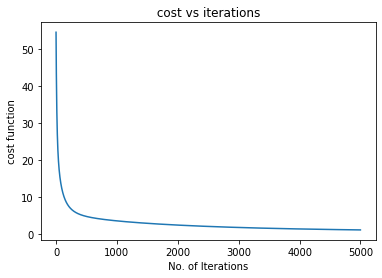

In [36]:
import matplotlib.pyplot as plt 

x = [i for i in range(len(past_costs))] 
# corresponding y axis values 
y=np.array(past_costs).ravel()
print(y)
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel(' No. of Iterations ') 
# naming the y axis 
plt.ylabel(' cost function ') 
  
# giving a title to my graph 
plt.title(' cost vs iterations ') 
  
# function to show the plot 
plt.show() 

### Mean Absolute Error (MAE) 

It is the mean of the absolute value of the errors. It is calculated as:
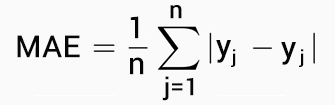

### Mean Squared Error (MSE) 
It is the mean of the squared errors and is calculated as:
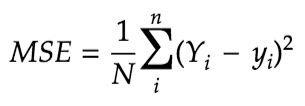

### Mean absolute percentage error (MAPE)

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning. It usually expresses the accuracy as a ratio defined by the formula:

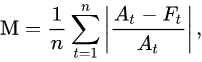

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
    





print('Mean Squared Error :', mean_squared_error(y_test,X_test.dot(theta)))
print('Mean Absolute Error :', mean_absolute_error(y_test,X_test.dot(theta)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test,X_test.dot(theta)))



Mean Squared Error : 2.0872168901413555
Mean Absolute Error : 1.1040537471218377
Mean Absolute Percentage Error: 60.15107376773218


### Observation : The MSE is larger than MAE.
